In [1]:
%matplotlib inline

In [2]:
from tri.generate import generate
import numpy as np

/home/tom/src/tri3/tri/delaunay.py:20: UserWarning: Robust predicates not available, falling back on non-robust implementation
  warnings.warn(


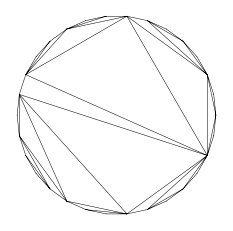

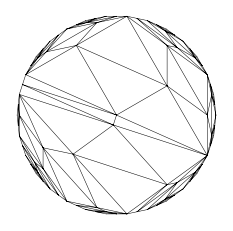

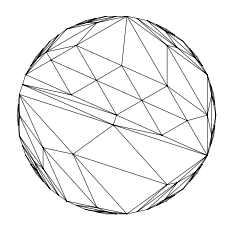

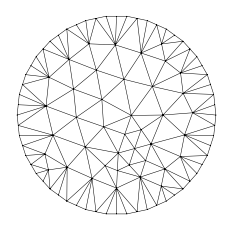

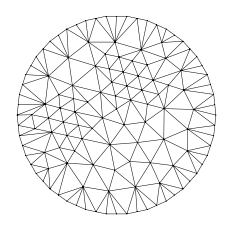

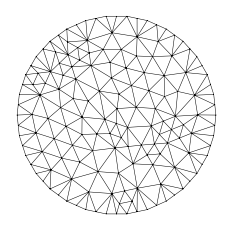

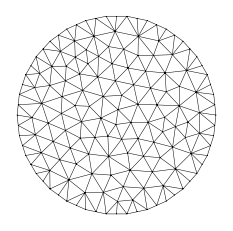

In [3]:
m = generate([(np.cos(t), np.sin(t)) for t in np.linspace(0, 2.*np.pi, 30, endpoint=False)])

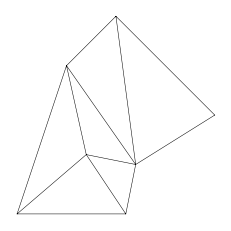

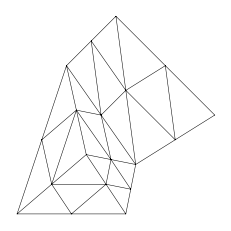

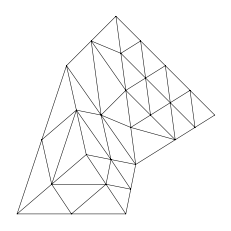

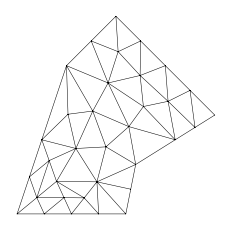

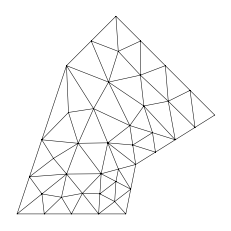

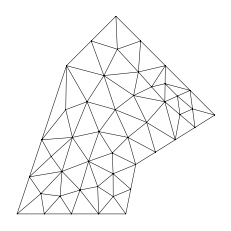

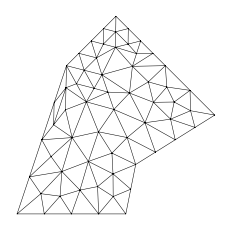

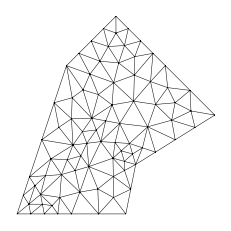

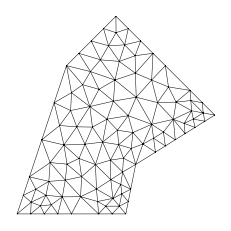

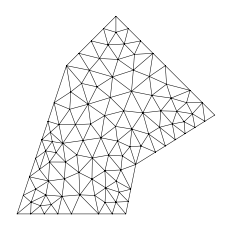

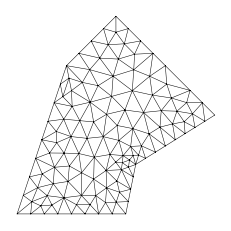

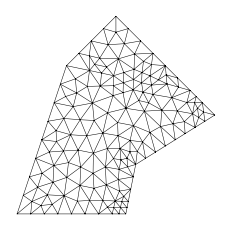

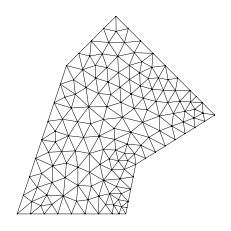

In [47]:
from tri.generate import generate

m = generate([
    (0.0, 0.0),
    (1.1, 0.0),
    (1.2, 0.5),
    (0.7, 0.6),
    (2.0, 1.0),
    (1.0, 2.0),
    (0.5, 1.5),], refloops=15, min_quality=0.6)

import meshio

meshio.write_points_cells(
    "test.msh",
    m.p.T,
    [
        ("triangle", m.t.T),
    ],
    # Optionally provide extra data on points, cells, etc.
    # point_data=point_data,
    # cell_data=cell_data,
    # field_data=field_data
    )

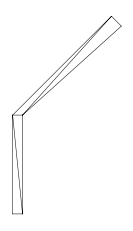

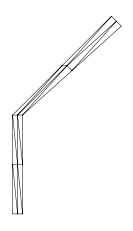

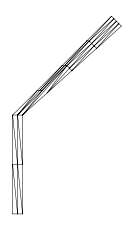

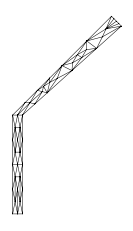

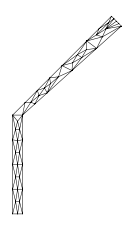

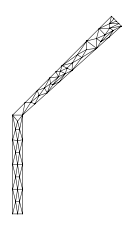

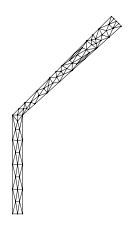

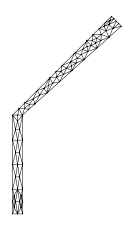

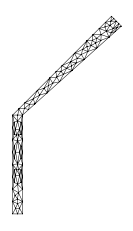

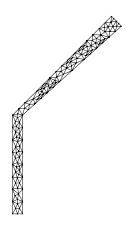

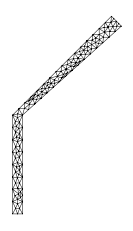

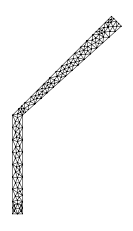

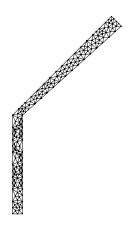

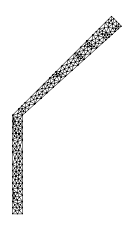

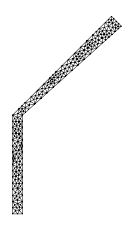

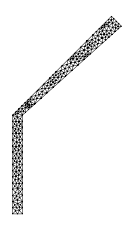

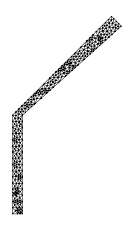

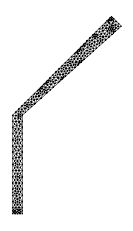

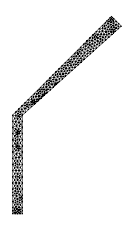

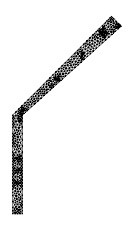

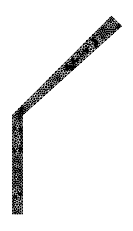

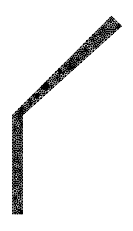

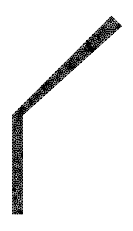

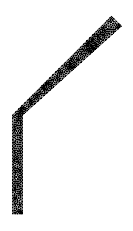

(3, 1326)

In [89]:
m = generate([
    (0.0, 0.0),
    (5.0, 5.0),
    (5.5, 4.5),
    (0.5, 0.0),
    (0.5, -5.0),
    (0., -5.0),], refloops=30, min_quality=0.35)

import meshio

meshio.write_points_cells(
    "test.msh",
    m.p.T,
    [
        ("triangle", m.t.T),
    ],
    file_format='ansys'
    )

m.t.shape

In [69]:
mesh = meshio.read(
    "beam.1.ele"
)
dir(mesh)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'cell_data',
 'cell_data_dict',
 'cell_sets',
 'cell_sets_dict',
 'cells',
 'cells_dict',
 'field_data',
 'get_cell_data',
 'get_cells_type',
 'gmsh_periodic',
 'info',
 'int_data_to_sets',
 'point_data',
 'point_sets',
 'points',
 'prune',
 'read',
 'sets_to_int_data',
 'write']

In [82]:
def export(m):
    f = open("points", "w")
    f.write("""FoamFile
{
    version     2.0;
    format      ascii;
    class       vectorField;
    location    "constant/polyMesh";
    object      points;
}
""")
    f.write("{}\n(\n".format(m.p.shape[1]))
    for itr in range(m.p.shape[1]):
        x, y = m.p[:, itr]
        f.write("({} {} 0)\n".format(x, y))
    f.write(")")
    f.close()

In [83]:
export(m)

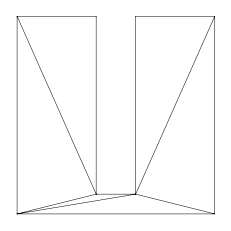

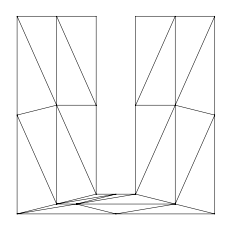

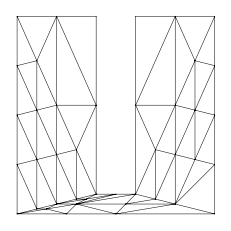

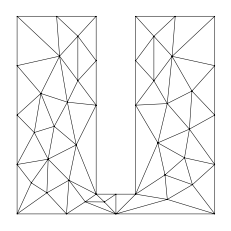

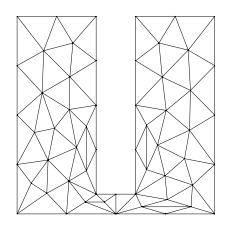

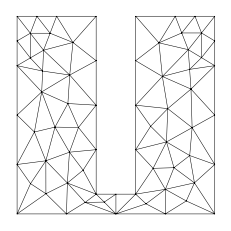

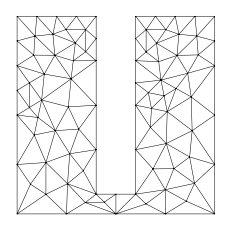

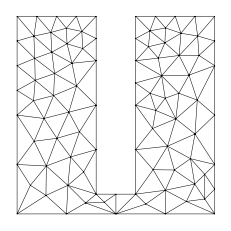

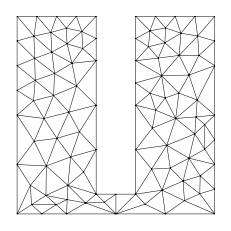

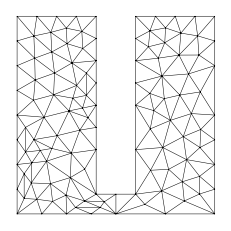

/home/tom/src/tri3/tri/generate.py:70: UserWarning: Unable to reach the quality constraints in 8 loops, avg: 0.9083562692032027/0.9, min: 0.2556532668473707/0.4.
  warnings.warn(("Unable to reach the quality "


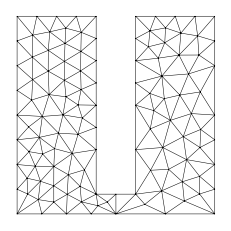

In [5]:
m = generate([(0., 0.),
              (1., 0.),
              (1., 1.),
              (.6, 1.),
              (.6, .1),
              (.4, .1),
              (.4, 1.),
              (0., 1.)])

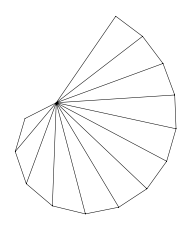

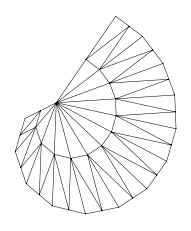

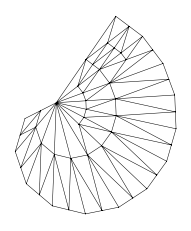

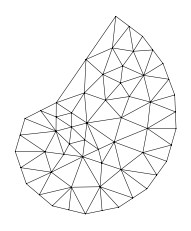

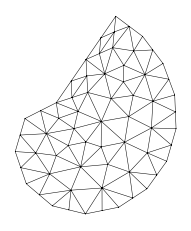

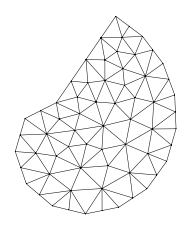

In [11]:
m = generate([
(-0.416  , 0.909),
(-1.35  ,  0.436),
(-1.64  , -0.549),
(-1.31  , -1.51),
(-0.532  ,-2.17),
( 0.454 , -2.41),
( 1.45 ,  -2.21),
( 2.29 ,  -1.66),
( 2.88 ,  -0.838),
( 3.16 ,   0.131),
( 3.12 ,   1.14),
( 2.77 ,   2.08),
( 2.16 ,   2.89),
( 1.36 ,   3.49)])

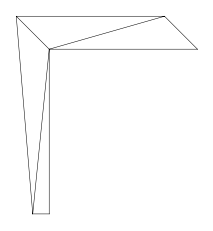

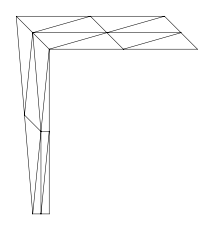

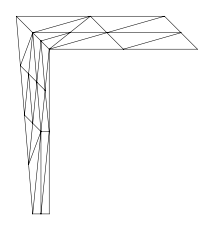

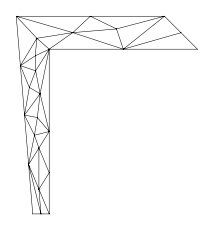

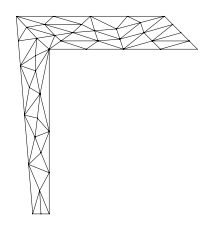

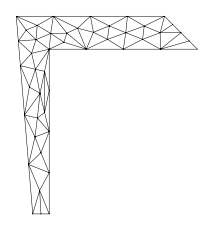

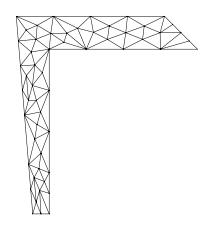

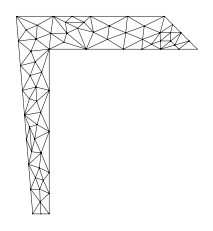

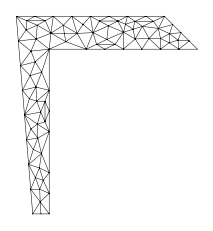

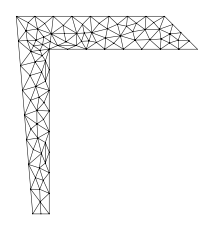

/home/tom/src/tri3/tri/generate.py:70: UserWarning: Unable to reach the quality constraints in 8 loops, avg: 0.8450842236323213/0.9, min: 0.27497647942407283/0.4.
  warnings.warn(("Unable to reach the quality "


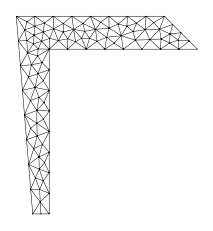

In [7]:
m = generate([(0.,0.),
              (0.1,0.),
              (0.1,1.0),
              (1.,1.),
              (0.8,1.2),
              (-0.1,1.2),]) 

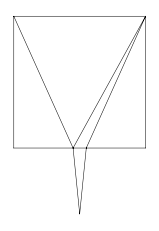

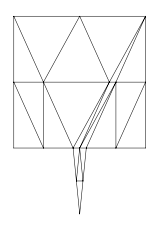

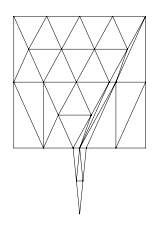

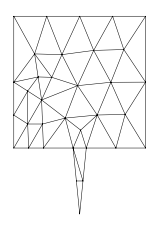

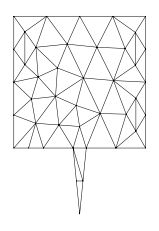

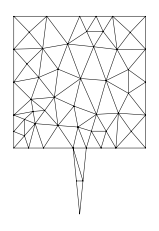

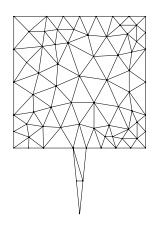

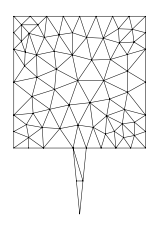

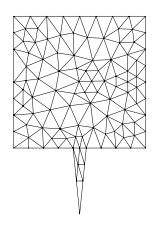

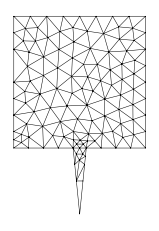

/home/tom/src/tri3/tri/generate.py:70: UserWarning: Unable to reach the quality constraints in 8 loops, avg: 0.9222665073548847/0.9, min: 0.319854534367628/0.4.
  warnings.warn(("Unable to reach the quality "


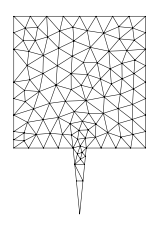

In [8]:
m = generate([(0.,0.),
              (0.45,0.),
              (0.5,-0.5),
              (0.55,0.),
              (1.,0.),
              (1.,1.),
             (0.,1.)]) 

In [9]:
import meshplex
mesh = meshplex.MeshTri(m.p.T, m.t.T)

In [10]:
np.min(mesh.cell_quality)

0.319854534367628

In [12]:
from skfem import *

In [13]:
m = MeshTri.init_refdom()

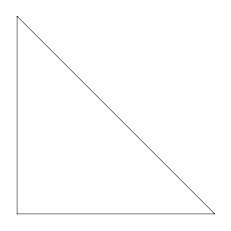

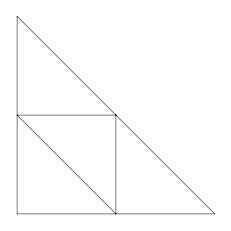

In [14]:
from skfem.visuals.matplotlib import *
draw(m)
m.refine()
draw(m)

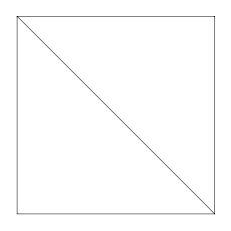

In [37]:
m = MeshTri()
draw(m)

In [38]:
m.refine([0])

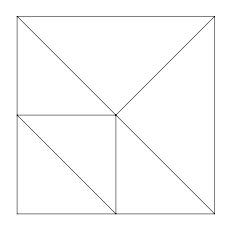

In [39]:
draw(m)

In [33]:
m.elements_satisfying(lambda x: (x[0]>0.5+1/6-1e-6)*(x[0]<0.5+1/6+1e-6))

array([0])

In [34]:
m.elements_satisfying(lambda x: (x[1]>0.5+1/6-1e-6)*(x[1]<0.5+1/6+1e-6))

array([2])

In [40]:
m.refine([4])

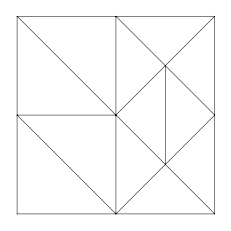

In [41]:
draw(m)